# Example 2: COVID Timelapse of 2020-21 in the US (Proportional Circle Map)

Other than choropleth maps, we can also create animations of Proportional Circle maps. Proportional circle maps (or graduated symbol maps) are an awesome way to demonstrate rapid change of events based on the proportional shift of the circle. COVID cases or number of deaths can be an excellent example to showcase such use cases. In this example, we will utilize the COVID cases data per county of the US in 2020.

## Datasets

The dataset for this example can be downloaded from [here](https://drive.google.com/drive/folders/1DVn2wk-plUv_WFUbiI7NMkb7mLCdnmH5?usp=sharing). You will find a shapefile named `county_shape.shp` (which is downloaded from [TIGER Census dataset](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)) and a csv file called `county_2020.csv` (downloaded from [New York Times COVID Repository](https://github.com/nytimes/covid-19-data)). For the unique ID, we can rely on the `FIP` code specified in both datasets. FIP is a unique code that represents every unique county in the US. If there was no FIP code available, we can always create a unique ID by concatenating State name and County name together like Example 1. That would require some extra steps before proceeding with this example.

## Animation

In [1]:
from maplapse.maplapse import Animator

The only difference in this case would be defining the `map_type` to `proportional_circle`. We can also specify some kwargs related to `proportional_circle` map, like the color of the circles, the transparancey, etc.

An important parameter for `proportional_circle` map is the `scale_factor`. The `scale_factor` is a constant value that reduces or increases the radius of circle. If no `scale_factor` is defined, then the radius of the circle would surpass the map. Therefore, you need to play with several values for this `scale_factor` and get an optimal value. However, in future, the package will incorporate automatic determination of the `scale_factor`.

In [2]:
anim = Animator(shape='/Users/sbhadra/Work/maplapse/data/covid/cb_2018_us_county_20m.shp',
                value='/Users/sbhadra/Work/maplapse/data/covid/county_2020.csv',
                time_column='date',
                data_column='cases',
                shape_unique_column='FIP',
                value_unique_column='fips',
                map_type='proportional_circle',
                out_path='/Users/sbhadra/Work/maplapse/data/covid/animation.gif',
                dpi=150,
                scale_factor=0.02,
                temporal_divisions=12,
                map_title='COVID Cases in US at 2020',
                font='Arial',
                font_size=7,
                poly_line_color='gray',
                poly_line_width=0.2,
                circle_color='red',
                circle_alpha=0.1)

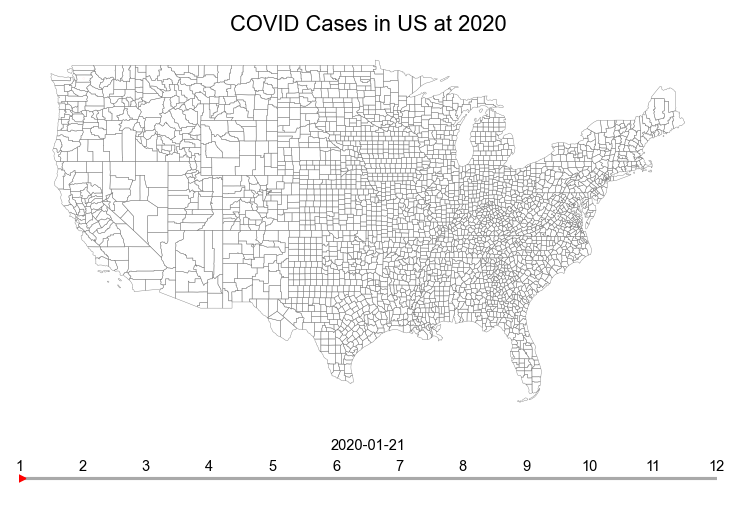

In [3]:
anim.view_frame()

There is no circle visible in the first frame. That is because the first values were may be very low. Therefore, lets increase the value to see if we can see any circle and if we are happy with the configurations.

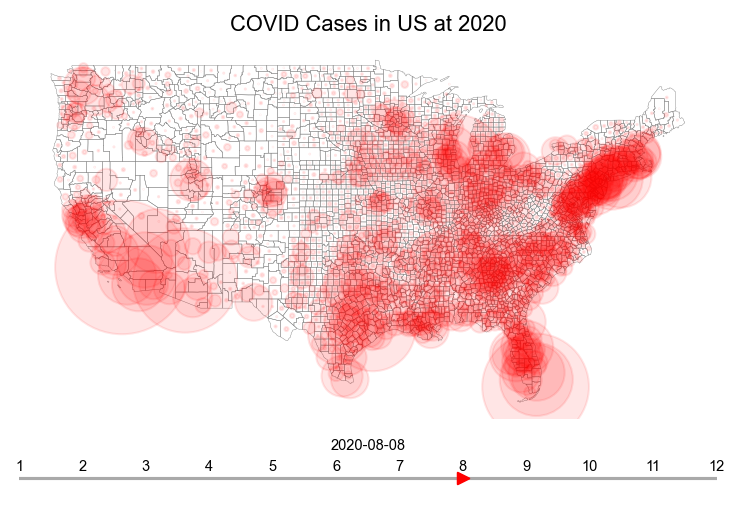

In [4]:
anim.view_frame(200)

It looks good. So let's complete the animation process.

In [5]:
anim.animate(duration=0.05)

100%|██████████| 346/346 [06:00<00:00,  1.04s/it]
